<a href="https://colab.research.google.com/github/TakashiFujiwara/Machine-learning-application/blob/main/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [2]:
cd drive

/content/drive


In [3]:
cd MyDrive

/content/drive/MyDrive


In [5]:
# local_modulesを読み込む
import sys
sys.path.append('local_modules')

Epoch 1/20
8/8 [==============================] - 3s 170ms/step - loss: 1.1572 - accuracy: 0.3083 - val_loss: 1.0956 - val_accuracy: 0.3500
Epoch 2/20
8/8 [==============================] - 1s 140ms/step - loss: 1.0962 - accuracy: 0.3875 - val_loss: 1.0859 - val_accuracy: 0.3833
Epoch 3/20
8/8 [==============================] - 1s 140ms/step - loss: 1.1526 - accuracy: 0.4792 - val_loss: 1.0321 - val_accuracy: 0.4833
Epoch 4/20
8/8 [==============================] - 1s 139ms/step - loss: 1.0101 - accuracy: 0.5208 - val_loss: 1.0164 - val_accuracy: 0.5333
Epoch 5/20
8/8 [==============================] - 1s 142ms/step - loss: 1.0004 - accuracy: 0.5250 - val_loss: 1.0404 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 1s 140ms/step - loss: 0.9782 - accuracy: 0.5792 - val_loss: 0.9299 - val_accuracy: 0.6500
Epoch 7/20
8/8 [==============================] - 1s 140ms/step - loss: 0.9786 - accuracy: 0.5417 - val_loss: 0.9128 - val_accuracy: 0.7333
Epoch 8/20
8/8 [====

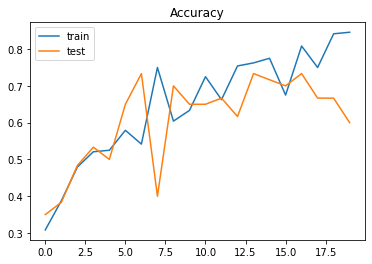

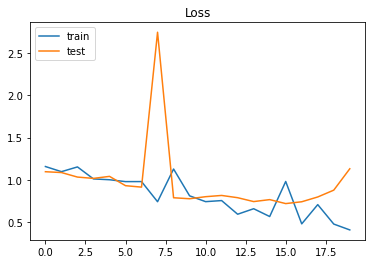

In [6]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 入力と出力を指定 --- (*1)
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み --- (*2)
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデルを取得 --- (*6)
model = cnn_model.get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')


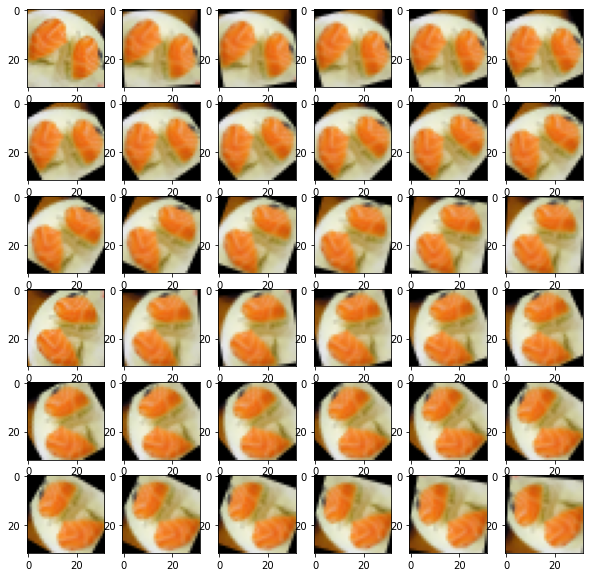

In [8]:
import matplotlib.pyplot as plt
import cv2

photos = np.load('image/photos.npz')
x=photos['x']
img=x[20]

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)

  center=(16,16)
  angle=i*5
  scale=1.0
  mtx=cv2.getRotationMatrix2D(center,angle,scale)
  img2=cv2.warpAffine(img,mtx,(32,32))
  plt.imshow(img2)
plt.show()


水増し前= 240
水増し後= 5760
Epoch 1/20
90/90 [==============================] - 24s 255ms/step - loss: 0.9488 - accuracy: 0.5863 - val_loss: 0.9062 - val_accuracy: 0.6167
Epoch 2/20
90/90 [==============================] - 23s 252ms/step - loss: 0.6147 - accuracy: 0.7608 - val_loss: 1.0632 - val_accuracy: 0.6167
Epoch 3/20
90/90 [==============================] - 23s 251ms/step - loss: 0.4378 - accuracy: 0.8241 - val_loss: 1.3976 - val_accuracy: 0.6167
Epoch 4/20
90/90 [==============================] - 22s 250ms/step - loss: 0.3002 - accuracy: 0.8899 - val_loss: 0.8511 - val_accuracy: 0.8500
Epoch 5/20
90/90 [==============================] - 23s 252ms/step - loss: 0.2348 - accuracy: 0.9278 - val_loss: 1.0443 - val_accuracy: 0.7833
Epoch 6/20
90/90 [==============================] - 25s 280ms/step - loss: 0.1665 - accuracy: 0.9486 - val_loss: 1.0663 - val_accuracy: 0.7833
Epoch 7/20
90/90 [==============================] - 23s 255ms/step - loss: 0.1035 - accuracy: 0.9668 - val_loss: 1.3341 -

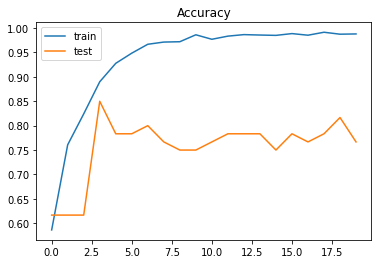

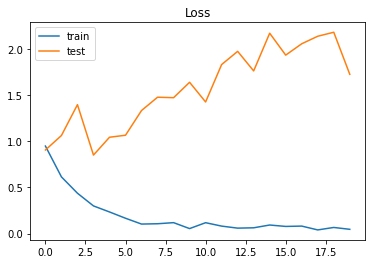

In [9]:
# CNNでMNISTの分類問題に挑戦
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# 入力と出力を指定
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# 学習用データを水増しする --- (*1)
x_new = []
y_new = []
for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        # 回転させる --- (*2)
        center = (16, 16) # 回転の中心点
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)
        # さらに左右反転させる --- (*3)
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)

# 水増しした画像を学習用に置き換える
print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))

# CNNモデルを取得 --- (*6)
model = cnn_model.get_model(in_shape, nb_classes)

# 学習を実行 --- (*8)
hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*9)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*10)
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model.hdf5')


In [11]:
pwd

'/content/drive/MyDrive'

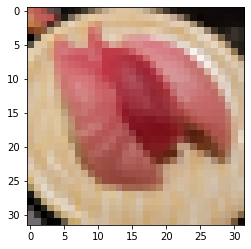

1/1 [==============================] - 0s 152ms/step
この写真は、 寿司 で、カロリーは 600 kcal
可能性は、 99 %


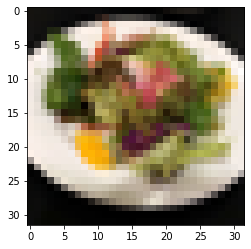

1/1 [==============================] - 0s 26ms/step
この写真は、 サラダ で、カロリーは 120 kcal
可能性は、 100 %


In [15]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

target_image = "./test-sushi.jpg"

im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["寿司", "サラダ", "麻婆豆腐"]
CALORIES = [600, 120, 650]

# 保存したCNNモデルを読み込む
model = cnn_model.get_model(in_shape, nb_classes)
model.load_weights('./image/photos-model.hdf5')

def check_photo(path):
    # 画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB") # 色空間をRGBに
    img = img.resize((im_cols, im_rows)) # サイズ変更
    plt.imshow(img)
    plt.show()
    # データに変換
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    # 答えを表示
    print("この写真は、", LABELS[idx], "で、カロリーは", CALORIES[idx],"kcal")
    print("可能性は、", per, "%")

if __name__ == '__main__':
    check_photo_str('./test-sushi.jpg')
    check_photo_str('./test-salad.jpg')
